In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import random
from tqdm import tqdm

# 要高清图像的话 把下面这行取消注释
# WARNING 高清图比较吃内存

# %config InlineBackend.figure_format='svg'

In [2]:
df = pd.read_csv('./data_proj_414.csv', index_col=0)
df_potter = df.query('Potter == 1')
df_weasley = df.query('Weasley == 1')
df_granger = df.query('Granger == 1')
df

,X,Y,Potter,Weasley,Granger,Trip,Close,Far
1,2.466284,3.582118,1,0,0,1,0,0
2,5.508336,8.295713,1,0,0,1,0,0
3,6.784481,11.851393,1,0,0,1,0,0
4,7.550499,14.411812,1,0,0,1,0,0
5,10.402096,17.218079,1,0,0,1,0,7
...,...,...,...,...,...,...,...,...
24090,40.615083,74.485727,0,0,1,49,4,16
24091,41.485127,74.335721,0,0,1,49,1,8
24092,41.275887,76.995216,0,0,1,49,1,2
24093,42.176981,76.159014,0,0,1,49,0,1






# trip visualization

50


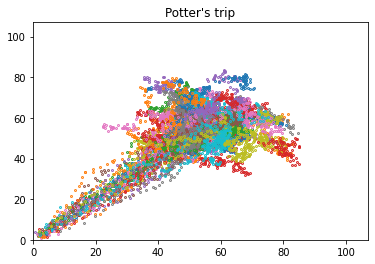

<Figure size 1800x1200 with 0 Axes>

In [3]:
# Potter's trip
trip_cnt = max(df_potter['Trip'])
print(len(df_potter['Trip'].unique()))

for t in range(len(df_potter['Trip'].unique())):
    temp_df = df_potter.query("Trip == @t")
    plt.plot(temp_df['X'], temp_df['Y'], 'o', markersize=1.9,linewidth=0.1, markerfacecolor='none')
    

plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title("Potter's trip")
plt.figure(dpi=300)


52


<Figure size 1800x1200 with 0 Axes>

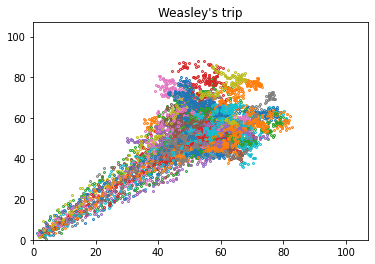

<Figure size 1800x1200 with 0 Axes>

In [4]:
# weasley's trip

trip_cnt = max(df_weasley['Trip'])
print(len(df_weasley['Trip'].unique()))

for t in range(len(df_weasley['Trip'].unique())):
    temp_df = df_weasley.query("Trip == @t")
    plt.plot(temp_df['X'], temp_df['Y'], 'o', markersize=1.9,linewidth=0.1, markerfacecolor='none')
    

plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title("Weasley's trip")
plt.figure(dpi=300)


49


<Figure size 1800x1200 with 0 Axes>

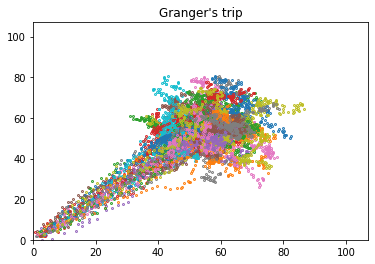

<Figure size 1800x1200 with 0 Axes>

In [5]:
# df_granger's trip

trip_cnt = max(df_granger['Trip'])
print(len(df_granger['Trip'].unique()))

for t in range(len(df_granger['Trip'].unique())):
    temp_df = df_granger.query("Trip == @t")
    plt.plot(temp_df['X'], temp_df['Y'], 'o', markersize=1.9,linewidth=0.1, markerfacecolor='none')
    

plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title("Granger's trip")
plt.figure(dpi=300)


# Task 1


## why log

e:\python\install\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

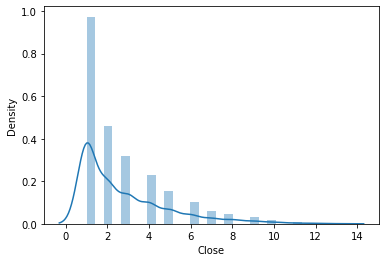

In [6]:
sns.distplot(df.query('Close > 0')['Close'])

e:\python\install\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

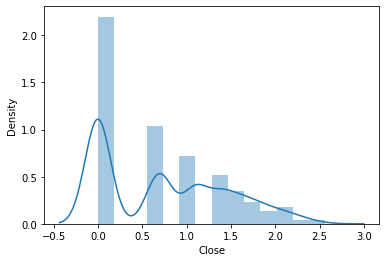

In [7]:
sns.distplot(np.log(df.query('Close > 0')['Close']))

In [8]:
min(df['Close']), max(df['Close'])

(0, 13)

e:\python\install\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Far', ylabel='Density'>

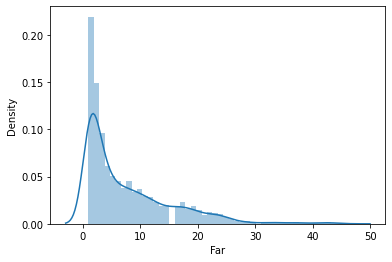

In [9]:
sns.distplot(df.query('Far > 0')['Far'])

e:\python\install\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Far', ylabel='Density'>

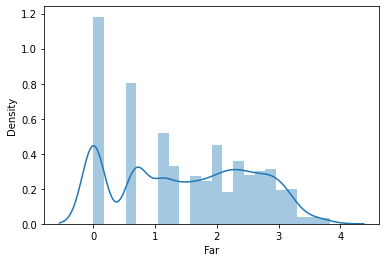

In [10]:
sns.distplot(np.log(df.query('Far > 0')['Far']))

In [11]:
min(df['Far']), max(df['Far'])

(0, 46)

## visualization

Text(0.5, 1.0, 'Close')

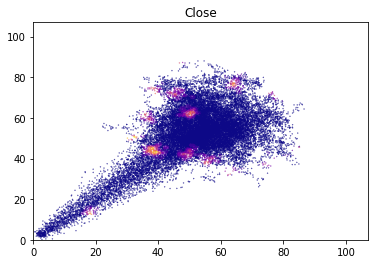

In [12]:
plt.scatter(df['X'], df["Y"], c=df['Close'], s=0.1, cmap='plasma')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Close')

e:\python\install\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Close_log')

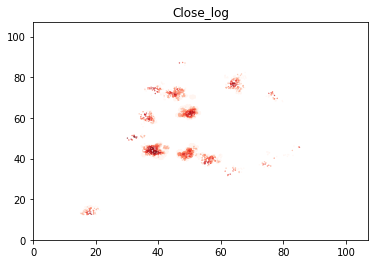

In [13]:
plt.scatter(df['X'], df["Y"], c=np.log(df['Close']), s=0.1, cmap='Reds')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Close_log')

Text(0.5, 1.0, 'Far')

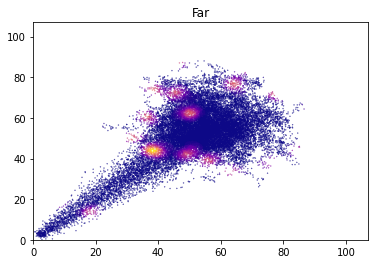

In [14]:
plt.scatter(df['X'], df["Y"], c=df['Far'], s=0.1, cmap='plasma')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Far')

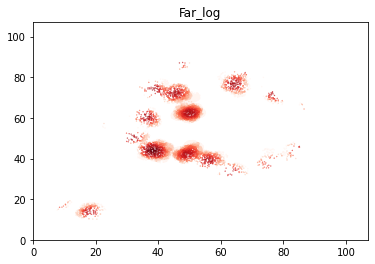

In [15]:
plt.scatter(df['X'], df["Y"], c=np.log(df['Far']), s=0.1, cmap='Reds')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Far_log')

plt.show()

# Task 2
The main task is to estimate the number of Jiuling in the Forbidden Forrest, then the location of Jiuling. The estimated number of Jiuling and their locations will largely affected by your assumptions. You first need to make sure you know and understand all the assumptions your model is based on. As long as your assumptions are consistent with the data, whether those assumptions are correct “in practice” is a secondary objective.

## TODO:
1. 假设每棵树掉落的果子数量符合1D高斯分布 $N(\mu, \sigma^2)$

    a. 还原出每一个cluster里真实的果子数量（类似扫雷？？）
    
    b. 根据总的果子数量 推测树的数量 K
    
    
2. 假设每棵树掉落的果子空间分布符合2D高斯分布 根据K 用GMM

2953 476


<ipython-input-17-7e97d8dbf003>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_round['X'] = round(df_round['X'],N)
<ipython-input-17-7e97d8dbf003>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_round['Y'] = round(df_round['Y'],N)


Potter   Weasley   Granger       Trip     Close        Far
X    Y                                                                 
15.0 13.0  0.333333  0.000000  0.666667  25.666667  1.666667   3.666667
     14.0  0.000000  1.000000  0.000000  51.000000  1.000000   4.000000
16.0 12.0  0.000000  0.000000  1.000000  37.000000  2.000000  10.000000
     13.0  0.000000  0.400000  0.600000  24.400000  2.000000  11.000000
     14.0  0.285714  0.285714  0.428571  26.857143  1.285714  11.285714
...             ...       ...       ...        ...       ...        ...
82.0 42.0  1.000000  0.000000  0.000000  11.000000  1.000000   3.000000
83.0 42.0  1.000000  0.000000  0.000000  23.000000  1.000000   8.000000
     44.0  1.000000  0.000000  0.000000  23.000000  2.000000  13.000000
     46.0  1.000000  0.000000  0.000000  23.000000  1.000000   9.000000
85.0 46.0  1.000000  0.000000  0.000000  23.000000  4.500000  14.500000

[476 rows x 6 columns]

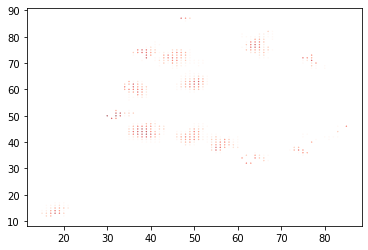

In [17]:
# 试图调整坐标小数位数 不是很成功
# 建议忽略这一部分

N = 0 # 小数位数

df_round = df.query('Close > 0')
df_round['X'] = round(df_round['X'],N)
df_round['Y'] = round(df_round['Y'],N)

totlist = list(zip(df_round['X'], df_round['Y']))
print(len(totlist),len(list(set(totlist))))

df_round = df_round.groupby(['X','Y']).agg('mean')
plt.scatter(list(zip(*df_round.index))[0], list(zip(*df_round.index))[1],c=np.log(df_round['Close']),cmap='Reds', s=0.1)
df_round

In [20]:
# return a dataframe of gridded world
def grid(grid_length, df):
    df_test_cluster = df.query("0 < X <= @grid_length").query("0 < Y <= @grid_length")
    plt.scatter(df_test_cluster['X'], df_test_cluster['Y'], s=3,c=df_test_cluster['Close'], cmap="Reds")

    close_cnt = pd.DataFrame()
    for i in range(grid_length):
        close_cnt[str(i)] = [-1 for x in range(grid_length)]
    close_cnt.index = [grid_length-1-x for x in range(grid_length)]

    for i in range(len(df_test_cluster)):
        x = math.floor(df_test_cluster.iloc[i,0])
        y = math.floor(df_test_cluster.iloc[i,1])
    #     print(x,y)
        close_cnt.iloc[grid_length - 1 - y,x] = max(close_cnt.iloc[grid_length - 1 - y,x], df_test_cluster.iloc[i,6] )
    #     print(df_test_cluster.iloc[i,:],'\n')

    close_cnt.to_csv('close_cnt_'+str(grid_length)+'.csv')
    return close_cnt

# return a df of visiting times
def visit(grid_length, df):
    df_test_cluster = df.query("0 < X <= @grid_length").query("0 < Y <= @grid_length")
#     plt.scatter(df_test_cluster['X'], df_test_cluster['Y'], s=3,c=df_test_cluster['Close'], cmap="Reds")

    close_cnt = pd.DataFrame()
    for i in range(grid_length):
        close_cnt[str(i)] = [0 for x in range(grid_length)]
    close_cnt.index = [grid_length-1-x for x in range(grid_length)]

    for i in range(len(df_test_cluster)):
        x = math.floor(df_test_cluster.iloc[i,0])
        y = math.floor(df_test_cluster.iloc[i,1])
    #     print(x,y)
        close_cnt.iloc[grid_length - 1 - y,x] += 1
    #     print(df_test_cluster.iloc[i,:],'\n')

    close_cnt.to_csv('visit_cnt_'+str(grid_length)+'.csv')
    return close_cnt

In [56]:
# grid求面积
visit_cnt = visit(107,df)
print('loose ', sum(visit_cnt[visit_cnt>0].count()) /(107*107))
print('strict', sum(visit_cnt[visit_cnt>1].count()) /(107*107))

loose  0.23958424316534196
strict 0.1994060616647742


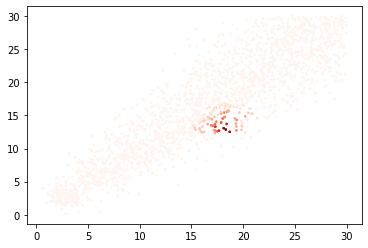

In [108]:
fruit_cnt = grid(30,df) #可以修改grid()的第一个参数 调整范围

In [103]:
(fruit_cnt>1).sum().sum()

322

看上去预测的果子总数其实和大于1的grid总数差不多（？

In [109]:
testData= fruit_cnt
testData

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
29,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
28,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,0,0,0,0,0,0,0,0,0
27,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
26,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
25,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
24,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
23,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
22,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
21,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
20,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [135]:
def localSum(prediction, i, j): # 边界可能会出问题
#     return prediction.iloc[i-1:i+2, j-1:j+2].sum().sum() # 九宫格
    return prediction.iloc[i, j-1:j+2].sum() + prediction.iloc[i-1:i+2, j].sum() - prediction.iloc[i,j]
    
    
def getLoss(target, prediction):
    loss = target.copy(deep=True)
    MSE = 0
    for i in range(len(target)):
        for j in range(len(target.iloc[0])):
            if target.iloc[i,j] == -1:
                loss.iloc[i,j] = float('NaN')
            else:
                loss.iloc[i,j] = target.iloc[i,j] - localSum(prediction, i, j)
                MSE += (target.iloc[i,j] - localSum(prediction, i, j)) ** 2
    return loss.sum().sum(), MSE, loss
            
def increaseP(prediction,x,y):
    y = int(y)
    candidates = [(x-1,y-1),(x,y-1),(x+1,y-1),(x-1,y),(x,y),(x+1,y),(x-1,y+1),(x,y+1),(x+1,y+1)]
    i,j = random.sample(candidates,1)[0]
    while i not in prediction.index or prediction.loc[i,str(j)] == 0:
        candidates.remove((i,j))
        if len(candidates) == 0:
            # 随便找一个-1
            print('used up!')
            prediction.loc[ prediction.stack().idxmin()] += 0.5
            return
        else:
            i,j = random.sample(candidates,1)[0]
#     print(i,j)
    prediction.loc[i,str(j)] += 0.5
    
def decreaseP(prediction,x,y):
    y = int(y)
#     candidates = [(x-1,y-1),(x,y-1),(x+1,y-1),(x-1,y),(x,y),(x+1,y),(x-1,y+1),(x,y+1),(x+1,y+1)]

    candidates = [(x-1,y),(x,y),(x+1,y),(x,y+1),(x, y-1)]

    i,j = random.sample(candidates,1)[0]
    while i not in prediction.index or prediction.loc[i,str(j)] <= 0:
        candidates.remove((i,j))
        if len(candidates) == 0:
            # 随便找一个-1
            print('used up!')
            prediction.loc[ prediction.stack().idxmax()] -= 0.5
            return
        else:
            i,j = random.sample(candidates,1)[0]
#     print(i,j)
    prediction.loc[i,str(j)] -= 0.5

def Predict(target):

    prediction = target.copy(deep=True)
    prediction[prediction <= 1] = 0
    prediction[prediction > 1] = 1

    totLoss = 100
    deltaLoss = 10
    MSE = 11
    loss_df = target.copy(deep=True)
    
    while abs(totLoss) > 3 or MSE > 60 or loss_df.stack().max() > 2 or loss_df.stack().min() < -2:
        newLoss, MSE, loss_df = getLoss(target, prediction)
#         print('loss:',newLoss, 'MSE:', MSE, '\nloss_df\n', loss_df, '\nprediction\n',  prediction.iloc[12:19,14:23], '\n', prediction.sum().sum())
#         print('loss:',newLoss, 'MSE:', MSE, '\n', prediction.sum().sum())
        
        if abs(totLoss) <= 3 and MSE <= 60 and loss_df.stack().max() <= 2 and loss_df.stack().min() >= -2:
#             print('111')
            break
        deltaLoss = totLoss - newLoss
        totLoss = newLoss
#         print(loss_df.stack().max(),loss_df.stack().min())        
#         if newLoss > 2 or -2 <= newLoss <= 2 and loss_df.stack().max() > 2:
        if loss_df.stack().max() > 2:
#             print('increase')
            x,y = loss_df.stack().idxmax()
            increaseP(prediction,x,y) 
#             print('finished')
#         elif newLoss < -2 or 2 >= newLoss >= -2 and loss_df.stack().min() < -2:
        elif loss_df.stack().min() < -2:
#             print('decrease')
            x,y = loss_df.stack().idxmin()
            decreaseP(prediction,x,y) 
#             print('finished')
        elif loss_df.stack().max() <= 2 and loss_df.stack().min() >= -2:
#             print('222')
            return prediction

    print('out of while', totLoss ,MSE )
    return prediction

In [145]:
for i in tqdm(range(100)):
    prediction = Predict(testData)
    rslt.append(prediction.sum().sum())
# # target
# loss_df.stack().max()

 17%|█████████████▎                                                                | 17/100 [43:51<3:34:07, 154.79s/it]


KeyboardInterrupt: 

In [146]:
rslt, sum(rslt)/len(rslt)

([22,
  23.5,
  22.5,
  20.0,
  22.0,
  23.5,
  22.0,
  24.0,
  21.5,
  23.0,
  23.5,
  23.5,
  22.5,
  23.0,
  22.0,
  23.5,
  22.0,
  23.0,
  23.0,
  22.0,
  23.0,
  22.5,
  23.0,
  22.0,
  24.0,
  22.5,
  23.0,
  21.0,
  22.0,
  23.5,
  23.0,
  23.0,
  22.0,
  23.0,
  22.5,
  23.5,
  23.0,
  22.0,
  23.0,
  22.5,
  22.5,
  21.5,
  24.5,
  22.0,
  22.5,
  23.0,
  22.5,
  22.5,
  21.0,
  23.0,
  23.0,
  24.0,
  23.0,
  21.5,
  23.5,
  23.0,
  23.5,
  23.0,
  21.0,
  21.0],
 22.625)

e:\python\install\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

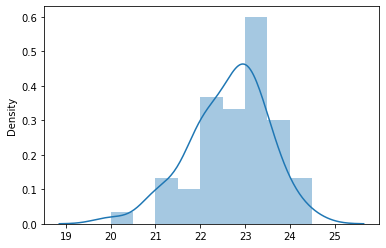

In [147]:
sns.distplot(rslt)

In [ ]:
skip

# -------------------- ignore the following codes ------------------- #

## K means

In [ ]:
def dist(posi1, posi2):
    return ((posi1[0] - posi2[0]) ** 2 + (posi1[1] - posi2[1]) ** 2) ** 0.5

In [ ]:
K = 15

all = list(zip(df.query("Close > 0")['X'], df.query("Close > 0")["Y"]))
centers = random.sample(all, K)
clusters = {} 
for i in range(K): 
    clusters[i] = []
# c = 
for i in range(100):
    for p in all:
        dists = []
        for c in centers:
            dists.append(dist(p, c))
        clusters[dists.index(min(dists))].append(p)
        
    for c in range(len(centers)):
        Xs, Ys = list(zip(*clusters[c]))
        length = len(Xs)
        centers[c] = (sum(Xs) / length, sum(Ys) / length)
    
#     plt.scatter(list(zip(*centers))[0], list(zip(*centers))[1], marker='x', c='b')
#     plt.show
    
for i in range(len(centers)):
    plt.scatter(list(zip(*clusters[i]))[0], list(zip(*clusters[i]))[1], s=0.01)
    
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Close')
    
plt.scatter(list(zip(*centers))[0], list(zip(*centers))[1], marker='x', c='b')
plt.show
            
            

In [ ]:
Xs, Ys = list(zip(*clusters[1]))
length = len(Xs)
(Xs / length, Ys / length)

In [ ]:
clusters = {}
for i in range(K): 
    clusters[i] = []

clusters

In [ ]:
list1 = list(np.random.normal(50,10,1000))
list2 = list(np.random.normal(50,10,1000))
tot = [list1[x] + list2[x]  for x in range(len(list1))]

In [ ]:
sns.distplot(list1)
sns.distplot(list2)
sns.distplot(tot)

In [ ]:
37.995711547948275 + 49.872696642992544